In [1]:
import sys, os
sys.path.append("/mit/rganti/SSC_python_modules/")

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from compute_ic import InformationCapacity
import numpy as np

In [3]:
from realistic_network import BindingParameters
from pysb import *
from pysb.integrate import odesolve
from pysb_sos_fb import SoSFeedback
np.set_printoptions(suppress=True)

/mit/rganti/.pkg/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
sos_model = SoSFeedback()
observables = sos_model.make_model()

In [5]:
sos_model.sos = [round(i) for i in np.linspace(0, 500, num=100)]

In [16]:
multiplier = 10.0

sos_model.model.parameters['Ras_GDP_0'].value = 5000

sos_model.model.parameters['k_sos_on_rgdp'].value =  0.0024 * multiplier
sos_model.model.parameters['k_sos_off_rgdp'].value =  3.0 * multiplier

sos_model.model.parameters['k_sos_on_rgtp'].value =  0.0022 * multiplier
sos_model.model.parameters['k_sos_off_rgtp'].value =  0.4 * multiplier

sos_model.model.parameters['k_rgdp_on_sos_rgtp'].value =  0.001 * multiplier
sos_model.model.parameters['k_rgdp_off_sos_rgtp'].value =  0.1 * multiplier
sos_model.model.parameters['k_cat_3'].value =  0.038 * 0.8 * multiplier

sos_model.model.parameters['k_rgdp_on_sos_rgdp'].value =  0.0014 * multiplier
sos_model.model.parameters['k_rgdp_off_sos_rgdp'].value =  1.0 * multiplier
sos_model.model.parameters['k_cat_4'].value =  0.003 * multiplier

sos_model.model.parameters['k_rgap_on_rgtp'].value =  0.0348 * multiplier
sos_model.model.parameters['k_rgap_off_rgtp'].value =  0.2 * multiplier
sos_model.model.parameters['k_cat_5'].value =  0.1 * multiplier

In [17]:
sos_array = []
output = []
for sos in sos_model.sos:
    sos_model.model.parameters['Sos_0'].value = sos
    y = odesolve(sos_model.model, sos_model.tspan, compiler="python")

    sos_array.append(sos)
    output.append(y[observables[0]][-1])
    
sos_total = np.array([sos_array, output])

Text(0,0.5,'Ras-GTP (# of molecules)')

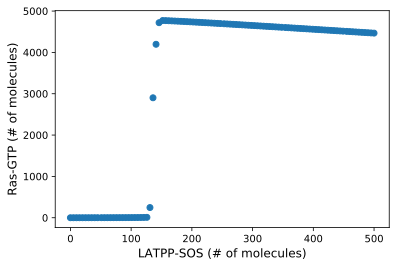

In [18]:
plt.plot(sos_array, output, linestyle="None", marker='o', label="Equal Rates")
plt.xlabel("LATPP-SOS (# of molecules)", size=12)
plt.ylabel("Ras-GTP (# of molecules)", size=12)
# plt.autoscale()

Loaded foreign column names
p(O) integral = 0.9702204704704703
C = 0.1755217708083219
p(O) integral = 0.9819822322322322
C = 0.21814679011561275
p(O) integral = 0.9902404904904906
C = 0.23491021291072273


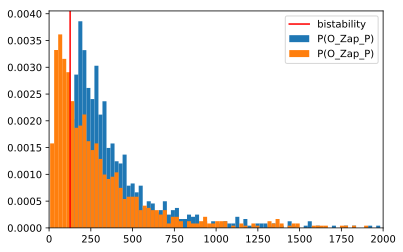

In [42]:
lf = 30
ic_lf = InformationCapacity(foreign_directory="early_positive_nonspecific/4_step/Ls_Lf_{0}/".format(lf), 
                            self_directory="early_positive_nonspecific/4_step/Ls/", limiting="self")
ic_lf.plot_cn()
ic_lf.plot_dn()
C = ic_lf.calculate_ic()

plt.axvline(126, color="r", label="bistability")
plt.xlim(0, 2000)
plt.legend()

Loaded foreign column names


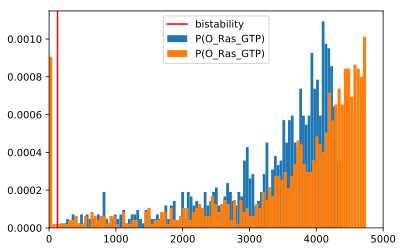

In [43]:
lf = 30
ic_lf = InformationCapacity(foreign_directory="early_positive_nonspecific/5_step/Ls_Lf_{0}/".format(lf), 
                            self_directory="early_positive_nonspecific/5_step/Ls/", limiting="self")
ic_lf.bins = 100
ic_lf.plot_cn()
ic_lf.plot_dn()
# C = ic_lf.calculate_ic()

plt.axvline(126, color="r", label="bistability")
plt.xlim(0, 5000)
plt.legend()

In [6]:
sos_model.sos = [round(i) for i in np.linspace(0, 500, num=100)]

In [7]:
multiplier = 10.0

sos_model.model.parameters['Ras_GDP_0'].value = 1000

sos_model.model.parameters['k_sos_on_rgdp'].value =  0.0024 * multiplier
sos_model.model.parameters['k_sos_off_rgdp'].value =  3.0 * multiplier

sos_model.model.parameters['k_sos_on_rgtp'].value =  0.0022 * multiplier * 12.0
sos_model.model.parameters['k_sos_off_rgtp'].value =  0.4 * multiplier

sos_model.model.parameters['k_rgdp_on_sos_rgtp'].value =  0.001 * multiplier
sos_model.model.parameters['k_rgdp_off_sos_rgtp'].value =  0.1 * multiplier
sos_model.model.parameters['k_cat_3'].value =  0.038 * 1.3 * multiplier

sos_model.model.parameters['k_rgdp_on_sos_rgdp'].value =  0.0014 * multiplier
sos_model.model.parameters['k_rgdp_off_sos_rgdp'].value =  1.0 * multiplier
sos_model.model.parameters['k_cat_4'].value =  0.003 * multiplier

sos_model.model.parameters['k_rgap_on_rgtp'].value =  0.0348 * multiplier
sos_model.model.parameters['k_rgap_off_rgtp'].value =  0.2 * multiplier
sos_model.model.parameters['k_cat_5'].value =  0.1 * multiplier

In [8]:
sos_array = []
output = []
for sos in sos_model.sos:
    sos_model.model.parameters['Sos_0'].value = sos
    y = odesolve(sos_model.model, sos_model.tspan, compiler="python")

    sos_array.append(sos)
    output.append(y[observables[0]][-1])
    
sos_total = np.array([sos_array, output])

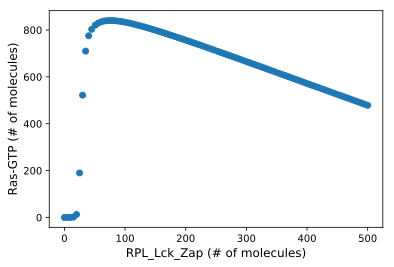

In [13]:
plt.plot(sos_array, output, linestyle="None", marker='o', label="Equal Rates")
plt.xlabel("RPL_Lck_Zap (# of molecules)", size=12)
plt.ylabel("Ras-GTP (# of molecules)", size=12)
plt.savefig("early_bistability.pdf", format='pdf')

Loaded foreign column names
p(O) integral = 0.9024999999999999
C = 0.1244385324696389
p(O) integral = 0.9420000000000001
C = 0.13185927424190455
p(O) integral = 0.9635
C = 0.18276880420404076
p(O) integral = 0.97325
C = 0.1909751845166781
p(O) integral = 0.98075
C = 0.2136313121893293
p(O) integral = 0.9860000000000001
C = 0.22339055025099674
p(O) integral = 0.98875
C = 0.22604932950911136
p(O) integral = 0.99175
C = 0.2370370787087967


Text(0.5,1,'Step 3, C =0.24')

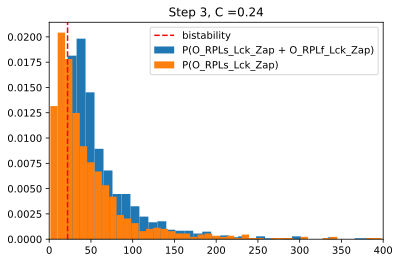

In [10]:
lf = 30
ic_lf = InformationCapacity(foreign_directory="3_step/Ls_Lf_{0}/".format(lf), 
                            self_directory="3_step/Ls/", limiting="self")
ic_lf.bins = 100
ic_lf.plot_cn()
ic_lf.plot_dn()
# C = ic_lf.calculate_ic()

plt.axvline(22, color="r", linestyle="--", label="bistability")
plt.legend()
plt.xlim(0, 400)
plt.title("Step 3, C ={0}".format(round(ic_lf.capacity,2)))
# plt.savefig("early_pos_fb_step_3.pdf", format='pdf')

Loaded foreign column names


/mit/rganti/SSC_python_modules/compute_ic.py:158: RuntimeWarning: divide by zero encountered in log2
  term_1_c0 = 0.5 * count_cn * np.nan_to_num(np.log2(count_cn / p_O))
/mit/rganti/SSC_python_modules/compute_ic.py:159: RuntimeWarning: divide by zero encountered in log2
  term_2_d0 = 0.5 * count_dn * np.nan_to_num(np.log2(count_dn / p_O))
/mit/rganti/SSC_python_modules/compute_ic.py:158: RuntimeWarning: invalid value encountered in divide
  term_1_c0 = 0.5 * count_cn * np.nan_to_num(np.log2(count_cn / p_O))
/mit/rganti/SSC_python_modules/compute_ic.py:159: RuntimeWarning: invalid value encountered in divide
  term_2_d0 = 0.5 * count_dn * np.nan_to_num(np.log2(count_dn / p_O))
/mit/rganti/.pkg/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


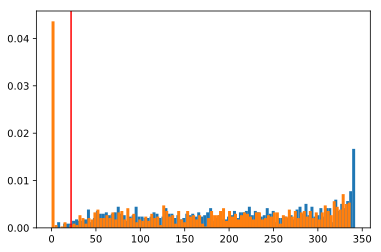

In [5]:
lf = 30
ic_lf = InformationCapacity(foreign_directory="4_step/Ls_Lf_{0}/".format(lf), 
                            self_directory="4_step/Ls/", limiting="self")
ic_lf.bins = 100
ic_lf.plot_cn()
ic_lf.plot_dn()

plt.axvline(22, color="r", label="bistability")
# plt.xlim(0, 400)

Loaded foreign column names
p(O) integral = 0.9449664664664663
C = 0.021855586944341955
p(O) integral = 0.9552224724724723
C = 0.03105275150175426
p(O) integral = 0.9619762262262261
C = 0.047968154992543637
p(O) integral = 0.967478978978979
C = 0.05204339263020096
p(O) integral = 0.9702299799799797
C = 0.07218971723168255
p(O) integral = 0.971981231231231
C = 0.08227933160516193
p(O) integral = 0.9732319819819815
C = 0.09636140033011312
p(O) integral = 0.9739822322322326
C = 0.10786600843787324
p(O) integral = 0.9744824824824825
C = 0.11112511287315026
p(O) integral = 0.9754832332332339
C = 0.13061847947255306
p(O) integral = 0.9764834834834832
C = 0.14885768047528924
p(O) integral = 0.9764834834834831
C = 0.15355409103964723
p(O) integral = 0.976483483483484
C = 0.16786615126974763
p(O) integral = 0.9777344844844844
C = 0.20328673666231653
p(O) integral = 0.9777344844844849
C = 0.2142416998642837
p(O) integral = 0.9777344844844842
C = 0.20822953219696516
p(O) integral = 0.977984484484

C = 0.8077534293283409
p(O) integral = 0.9892437437437365
C = 0.8140969009799615
p(O) integral = 0.9892437437437378
C = 0.8202355303083371
p(O) integral = 0.9892437437437459
C = 0.8113260980552257
p(O) integral = 0.9892437437437458
C = 0.810389341643658
p(O) integral = 0.9892437437437471
C = 0.8118048120346228
p(O) integral = 0.9892437437437454
C = 0.8293732582305325
p(O) integral = 0.9899944944944961
C = 0.833002134372906
p(O) integral = 0.9899944944944847
C = 0.8480006283343056
p(O) integral = 0.9899944944944918
C = 0.8293736743200557
p(O) integral = 0.9899944944944925
C = 0.8341576648342091
p(O) integral = 0.9904949949950104
C = 0.8205621407154586


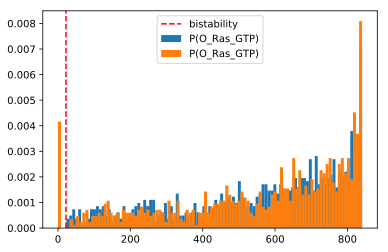

In [11]:
lf = 30
ic_lf = InformationCapacity(foreign_directory="4_step_1000/Ls_Lf_{0}/".format(lf), 
                            self_directory="4_step_1000/Ls/", limiting="self")
ic_lf.bins = 100
ic_lf.plot_cn()
ic_lf.plot_dn()

plt.axvline(22, color="r", linestyle='--', label="bistability")
plt.legend()
# plt.savefig("early_pos_fb_step_4.pdf", format='pdf')